<a href="https://colab.research.google.com/github/feniltailor22/Machine-Learning-Projects/blob/main/GMM_on_blobs_24M21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

In [ ]:
X = X[:,::-1]

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(4,random_state = 0)
labels_k = kmeans.fit(X).predict(X)

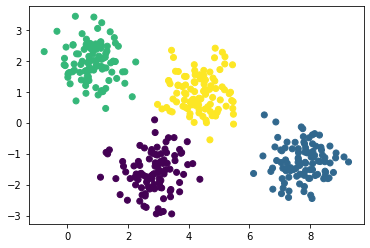

In [ ]:
plt.scatter(X[:,0], X[:,1], c = labels_k)

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels_k = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels_k, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels_k == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

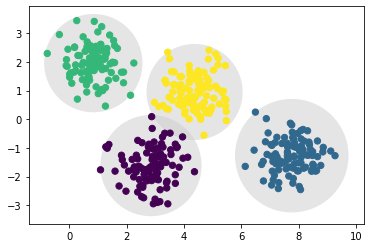

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans,X)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X, labels_k)

0.6783938627405857

In [ ]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

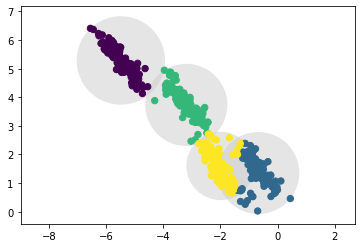

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)
labels_ks = kmeans.fit(X_stretched).predict(X_stretched)

In [ ]:
silhouette_score(X_stretched,labels_ks)

0.5603954017272353

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gmm = GaussianMixture(n_components=4).fit(X)
labels_gmm = gmm.predict(X)

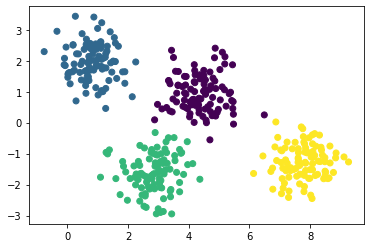

In [ ]:
plt.scatter(X[:,0], X[:,1], c = labels_gmm)

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels_gmm = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels_gmm, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

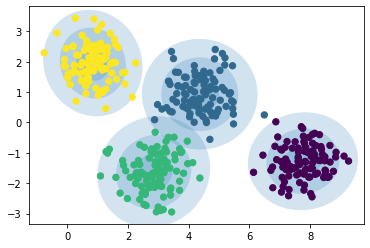

In [ ]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X)

In [ ]:
silhouette_score(X, labels_gmm)

0.6778186532400019

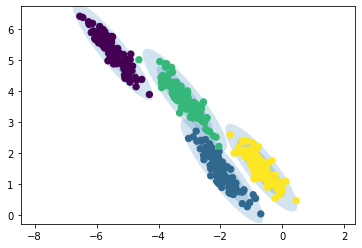

In [ ]:
gmm = GaussianMixture(n_components=4, random_state=42)
plot_gmm(gmm, X_stretched)

In [ ]:
labels_gmms = gmm.predict(X_stretched)

In [ ]:
silhouette_score(X_stretched, labels_gmms)

0.544003289849064